# K-means Clustering : Pattern Discovery and Color Space Reduction

- First, you'll interact with a toy dataset to build intuition on how grouping similar data points can reveal underlying structure.
- Then, you’ll apply the same approach to simplify a digital image by limiting its color palette to the most frequently occurring tones.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *

%matplotlib inline

You will implement the two phases of the K-means algorithm separately
in the next sections. 
* You will start by completing `find_closest_centroid` and then proceed to complete `compute_centroids`.

In [2]:
# UNQ_C1
# GRADED FUNCTION: find_closest_centroids

def find_closest_centroids(X, centroids):
    """
    Computes the centroid memberships for every example
    
    Args:
        X (ndarray): (m, n) Input values      
        centroids (ndarray): k centroids
    
    Returns:
        idx (array_like): (m,) closest centroids
    
    """

    # Set K
    K = centroids.shape[0]

    # You need to return the following variables correctly
    idx = np.zeros(X.shape[0], dtype=int)

    ### START CODE HERE ###
    ### END CODE HERE ###
    
    return idx

Now let's check your implementation using an example dataset

In [3]:
# Load an example dataset that we will be using
X = load_data()

The code below prints the first five elements in the variable `X` and the dimensions of the variable

In [4]:
print("First five elements of X are:\n", X[:5]) 
print('The shape of X is:', X.shape)

First five elements of X are:
 [[1.84207953 4.6075716 ]
 [5.65858312 4.79996405]
 [6.35257892 3.2908545 ]
 [2.90401653 4.61220411]
 [3.23197916 4.93989405]]
The shape of X is: (300, 2)


In [5]:
# Select an initial set of centroids (3 Centroids)
initial_centroids = np.array([[3,3], [6,2], [8,5]])

# Find closest centroids using initial_centroids
idx = find_closest_centroids(X, initial_centroids)

# Print closest centroids for the first three elements
print("First three elements in idx are:", idx[:3])

# UNIT TEST
from public_tests import *

find_closest_centroids_test(find_closest_centroids)


First three elements in idx are: [0 2 1]
All tests passed!


**Expected Output**:
<table>
  <tr>
    <td> <b>First three elements in idx are<b></td>
    <td> [0 2 1] </td> 
  </tr>
</table>

In [ ]:
# UNQ_C2
# GRADED FUNCTION: compute_centpods

def compute_centroids(X, idx, K):
    """
    Returns the new centroids by computing the means of the 
    data points assigned to each centroid.
    
    Args:
        X (ndarray):   (m, n) Data points
        idx (ndarray): (m,) Array containing index of closest centroid for each 
                       example in X. Concretely, idx[i] contains the index of 
                       the centroid closest to example i
        K (int):       number of centroids
    
    Returns:
        centroids (ndarray): (K, n) New centroids computed
    """
    
    # Useful variables
    m, n = X.shape
    
    # You need to return the following variables correctly
    centroids = np.zeros((K, n))
    
    ### START CODE HERE ###
    ### END CODE HERE ## 
    
    return centroids

Now check your implementation by running the cell below

In [7]:
K = 3
centroids = compute_centroids(X, idx, K)

print("The centroids are:", centroids)

# UNIT TEST
compute_centroids_test(compute_centroids)


The centroids are: [[2.42830111 3.15792418]
 [5.81350331 2.63365645]
 [7.11938687 3.6166844 ]]
All tests passed!


**Expected Output**:

2.42830111 3.15792418

5.81350331 2.63365645

7.11938687 3.6166844 

<a name="2"></a>
## 2 - K-means on a sample dataset 

After you have completed the two functions (`find_closest_centroids`
and `compute_centroids`) above, the next step is to run the
K-means algorithm on a toy 2D dataset to help you understand how
K-means works. 
* We encourage you to take a look at the function (`run_kMeans`) below to understand how it works. 
* Notice that the code calls the two functions you implemented in a loop.

When you run the code below, it will produce a
visualization that steps through the progress of the algorithm at
each iteration. 
* At the end, your figure should look like the one displayed in Figure 1.

<img src="images/figure 1.png" width="500" height="500">


**Note**: You do not need to implement anything for this part. Simply run the code provided below.
Explain the results in your report.

In [8]:
# You do not need to implement anything for this part

def run_kMeans(X, initial_centroids, max_iters=10, plot_progress=False):
    """
    Runs the K-Means algorithm on data matrix X, where each row of X
    is a single example
    """
    
    # Initialize values
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids    
    idx = np.zeros(m)
    
    # Run K-Means
    for i in range(max_iters):
        
        #Output progress
        print("K-Means iteration %d/%d" % (i, max_iters-1))
        
        # For each example in X, assign it to the closest centroid
        idx = find_closest_centroids(X, centroids)
        
        # Optionally plot progress
        if plot_progress:
            plot_progress_kMeans(X, centroids, previous_centroids, idx, K, i)
            previous_centroids = centroids
            
        # Given the memberships, compute new centroids
        centroids = compute_centroids(X, idx, K)
    plt.show() 
    return centroids, idx

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


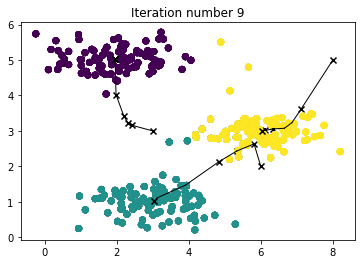

In [9]:
# Load an example dataset
X = load_data()

# Set initial centroids
initial_centroids = np.array([[3,3],[6,2],[8,5]])
K = 3

# Number of iterations
max_iters = 10

centroids, idx = run_kMeans(X, initial_centroids, max_iters, plot_progress=True)

<a name="3"></a>
## 3 - Random initialization

The initial assignments of centroids for the example dataset was designed so that you will see the same figure as in Figure 1. In practice, a good strategy for initializing the centroids is to select random examples from the
training set.

**Note**: You do not need to make implement anything for this part of the exercise. Provide an explanation of the implementation in your report.



In [10]:
# You do not need to modify this part

def kMeans_init_centroids(X, K):
    """
    This function initializes K centroids that are to be 
    used in K-Means on the dataset X
    
    Args:
        X (ndarray): Data points 
        K (int):     number of centroids/clusters
    
    Returns:
        centroids (ndarray): Initialized centroids
    """
    
    # Randomly reorder the indices of examples
    randidx = np.random.permutation(X.shape[0])
    
    # Take the first K examples as centroids
    centroids = X[randidx[:K]]
    
    return centroids

<a name="4"></a>
## 4 - Reducing Visual Complexity with Unsupervised Grouping

In this part, you’ll apply a grouping technique to simplify a digital image by reducing the variety of colors it contains.

* Typically, each pixel in a standard image is described using three 8-bit values, representing the intensity of red, green, and blue — commonly known as **RGB encoding**.
* The image you’ll work with contains thousands of distinct colors. Your goal here is to limit that number to just **16 representative tones**.
* This reduction allows for a more compact representation of the image, requiring only:
  - the RGB values for 16 representative colors, and
  - a 4-bit index per pixel to indicate which color it maps to.

In essence, you’ll treat each pixel’s RGB triplet as a data point in 3D space, and use an unsupervised learning approach to group similar colors together.
* The grouping process will identify **16 centers** in the color space that best represent the distribution of colors in the image.
* Once these representative colors are identified, you will reconstruct the image by replacing each pixel with the closest matching color from this set.


<a name="4.1"></a>
### 4.1 Dataset

**Loading the visual data**

To begin, use the `matplotlib` library to import and display the original image.


In [3]:
# Load an image of a bird
original_img = plt.imread('image.png')

**Visualize image**

You can visualize the image that was just loaded using the code below.

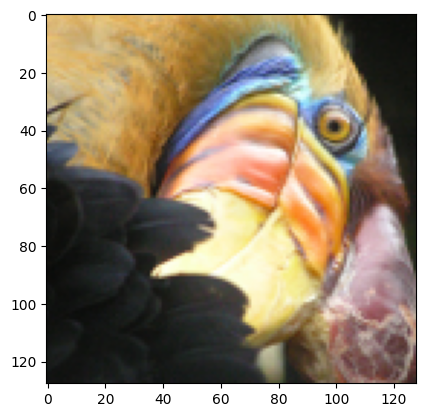

In [4]:
# Visualizing the image
plt.imshow(original_img)

**Check the dimension of the variable**

As always, you will print out the shape of your variable to get more familiar with the data.

In [13]:
print("Shape of original_img is:", original_img.shape)

Shape of original_img is: (128, 128, 3)


In your report, briefly describe how the raw image data is structured and how it is preprocessed before clustering.

Specifically, address:

* What the shape of the original image array represents in terms of pixel positions and color channels.

* How and why the image data is reshaped into a 2D matrix before applying the clustering algorithm.

* What the dimensions of the reshaped matrix represent.


In [ ]:
# Divide by 255 so that all values are in the range 0 - 1
original_img = original_img.astype(float) / 255.0

# Reshape the image into an m x 3 matrix where m = number of pixels
# (in this case m = 128 x 128 = 16384)
# Each row will contain the Red, Green and Blue pixel values
# This gives us our dataset matrix X_img that we will use K-Means on.

X_img = original_img.reshape(-1, 3)

<a name="4.2"></a>
### 4.2 K-Means on image pixels

Now, run the cell below to run K-Means on the pre-processed image.

In [15]:
# Run your K-Means algorithm on this data
# You should try different values of K and max_iters here
K = 16                       
max_iters = 10               

# Using the function you have implemented above. 
initial_centroids = kMeans_init_centroids(X_img, K) 

# Run K-Means - this takes a couple of minutes
centroids, idx = run_kMeans(X_img, initial_centroids, max_iters) 

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


In [16]:
print("Shape of idx:", idx.shape)
print("Closest centroid for the first five elements:", idx[:5])

Shape of idx: (16384,)
Closest centroid for the first five elements: [1 2 2 1 1]


<a name="4.3"></a>
### 4.3 Compress the image


After finding the top $K=16$ colors to represent the image, you can now
assign each pixel position to its closest centroid using the
`find_closest_centroids` function. 
* This allows you to represent the original image using the centroid assignments of each pixel. 
* Notice that you have significantly reduced the number of bits that are required to describe the image. 
    * The original image required 24 bits for each one of the $128\times128$ pixel locations, resulting in total size of $128 \times 128 \times 24 = 393,216$ bits. 
    * The new representation requires some overhead storage in form of a dictionary of 16 colors, each of which require 24 bits, but the image itself then only requires 4 bits per pixel location. 
    * The final number of bits used is therefore $16 \times 24 + 128 \times 128 \times 4 = 65,920$ bits, which corresponds to compressing the original image by about a factor of 6.

In [17]:
# Represent image in terms of indices
X_recovered = centroids[idx, :] 

# Reshape recovered image into proper dimensions
X_recovered = np.reshape(X_recovered, original_img.shape) 

After reconstructing the image using the cluster assignments and corresponding color centroids:

* Visually compare the reconstructed image to the original.

* In your report, comment on which visual details have been preserved and which ones appear to be lost or altered.

* What signs of compression artifacts (such as color banding or reduced gradients) can you observe?

* Does the reduced color palette (e.g., 16 colors) adequately capture the content of the original image for your use case?





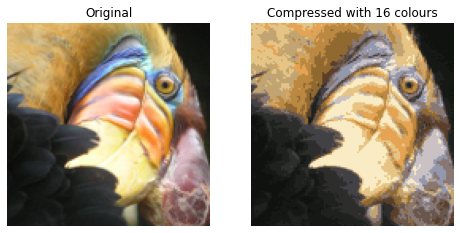

In [ ]:
# Display original image
fig, ax = plt.subplots(1,2, figsize=(8,8))
plt.axis('off')

ax[0].imshow(original_img*255)
ax[0].set_title('Original')
ax[0].set_axis_off()


# Display compressed image
ax[1].imshow(X_recovered*255)
ax[1].set_title('Compressed with %d colours'%K)
ax[1].set_axis_off()